In [1]:
from pyforest import*
print('the length of the items in the pyforest library--->',len(lazy_imports()))
import warnings
warnings.filterwarnings('ignore')


the length of the items in the pyforest library---> 79


In [2]:
lazy_imports()

['import pandas as pd',
 'from sklearn.impute import SimpleImputer',
 'from sklearn.model_selection import train_test_split',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn.model_selection import KFold',
 'from pathlib import Path',
 'import fastai',
 'import sklearn',
 'from sklearn.preprocessing import OneHotEncoder',
 'import plotly.graph_objs as go',
 'import gensim',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.linear_model import LassoCV',
 'from scipy import signal as sg',
 'import sys',
 'from dask import dataframe as dd',
 'from sklearn.manifold import TSNE',
 'import spacy',
 'from sklearn.decomposition import PCA',
 'from sklearn.ensemble import RandomForestRegressor',
 'import imutils',
 'from xlrd import open_workbook',
 'import statsmodels.api as sm',
 'import re',
 'import skimage',
 'from openpyxl import load_workbook',
 'import pickle',
 'import plotly.express as px',
 'import statistics',
 'from sklearn.linear_model import 

In [3]:
# THIS TRAIN DATA WAS IS DIFFERENT PDF.
Train_data = pd.read_csv(r"C:\Users\HP\Downloads\ML project datasets\bigmart_train.csv")

<IPython.core.display.Javascript object>

In [4]:
# AMD THIS TEST DATA WAS ALSO IN DIFFERENT PDF.LATER WE WILL CONCAT THESE TWO DATASET INTO THE NEW DATASET.
Test_data = pd.read_csv(r"C:\Users\HP\Downloads\ML project datasets\bigmart_test.csv")

<IPython.core.display.Javascript object>

In [5]:
Train_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
Test_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
print(Train_data.shape)
print(Test_data.shape)

(8523, 12)
(5681, 11)


In [8]:
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [9]:
Train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
Test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
Train_data['Source']='train'
Test_data['Source']='test'
df = pd.concat([Train_data,Test_data],ignore_index=True) # HERE WE CONCAT BOTH DATASET INTO THE NEW DATASET WHICH IS DF.

<IPython.core.display.Javascript object>

In [12]:
df.shape

(14204, 13)

In [13]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


In [14]:
df['Source'].value_counts()

train    8523
test     5681
Name: Source, dtype: int64

In [15]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

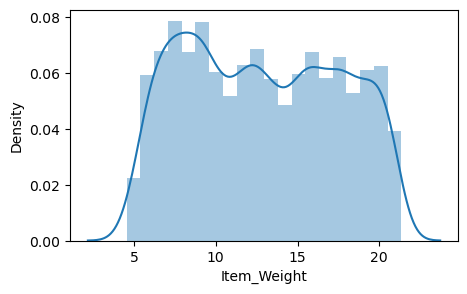

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

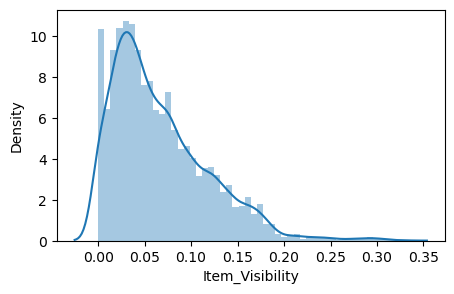

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

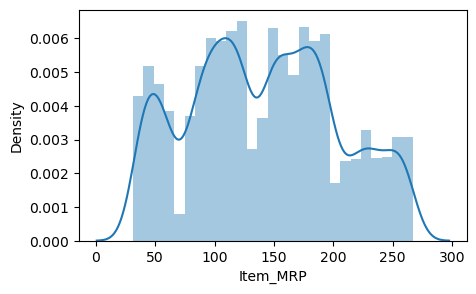

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

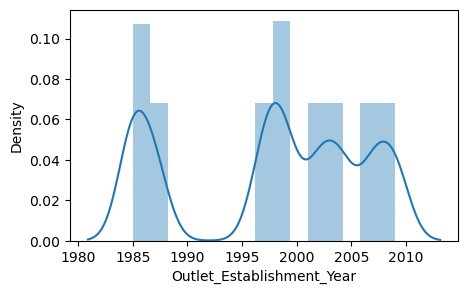

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

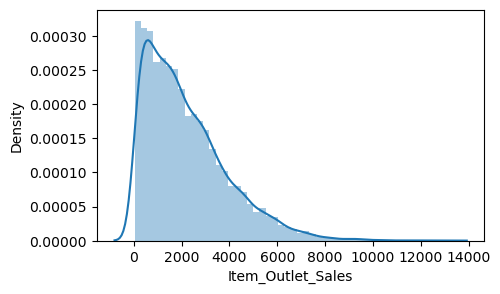

In [16]:
# DISTPLOT
for i in Train_data.describe().columns:
    plt.figure(figsize=(5,3))
    sns.distplot(Train_data[i].dropna())
    plt.show()
    

In [17]:
Train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [18]:
Train_data.describe().columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

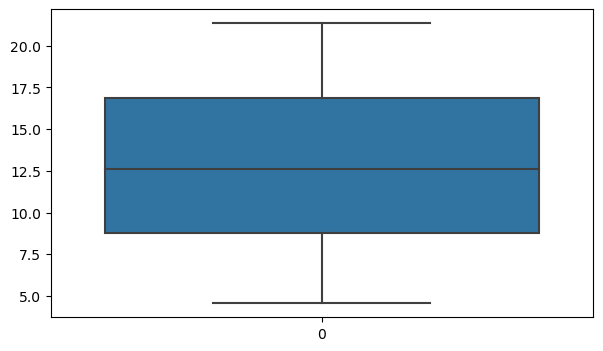

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

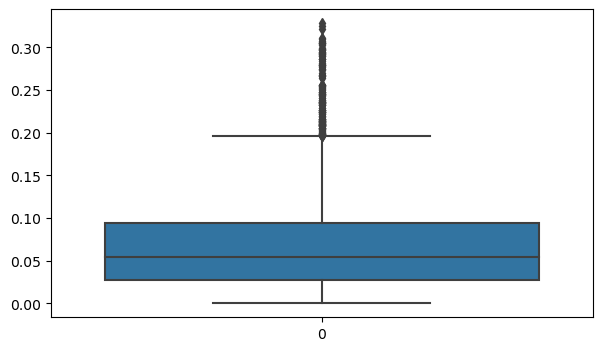

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

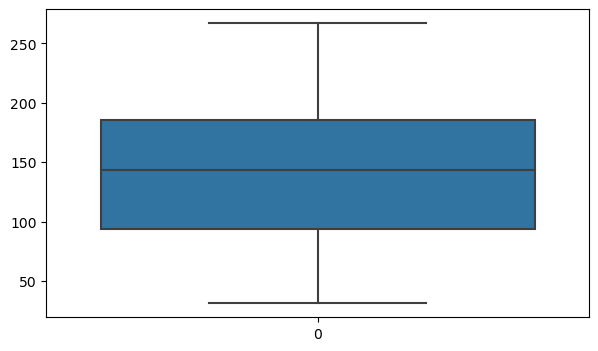

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

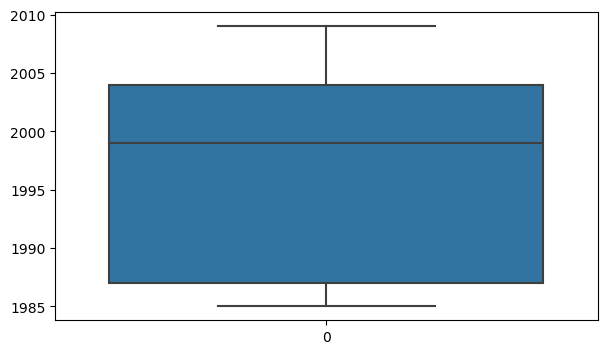

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

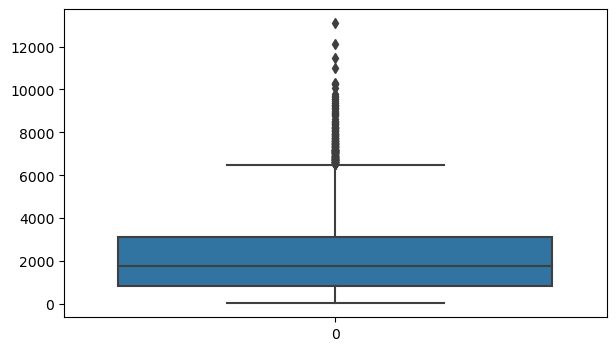

In [19]:
# BOXPLOT
for i in Train_data.describe().columns:
    plt.figure(figsize=(7,4))
    sns.boxplot(Train_data[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

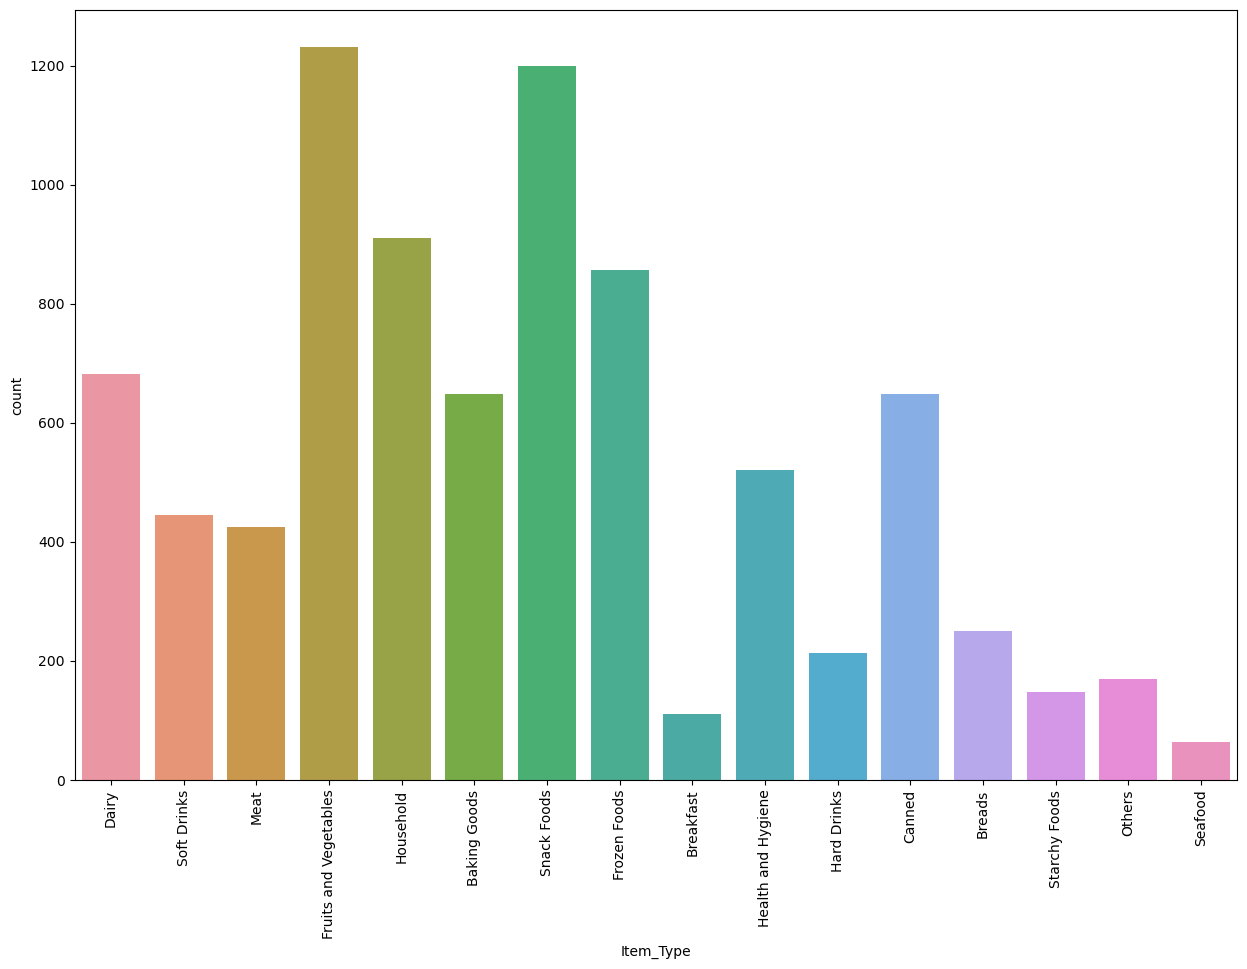

In [20]:
# COUNTPLOT
plt.figure(figsize=(15,10))
sns.countplot(data=Train_data,x='Item_Type')
plt.xticks(rotation=90)
plt.show()

In [21]:
Train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

### DISTRIBUTION OF THE OUTLET SIZE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

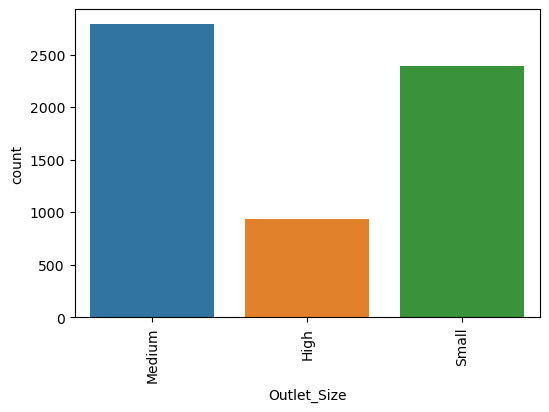

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=Train_data,x='Outlet_Size')
plt.xticks(rotation=90)
plt.show()

### DISTRIBUTION OF OUTLET LOCATION TYPE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

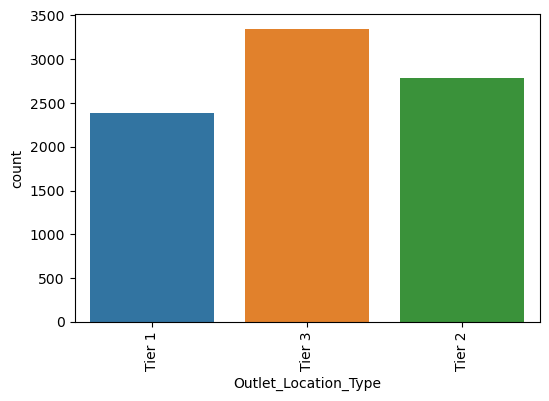

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=Train_data,x='Outlet_Location_Type')
plt.xticks(rotation=90)
plt.show()

In [24]:
Train_data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

### DISTRIBUTION OF THE OUTLET TYPE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

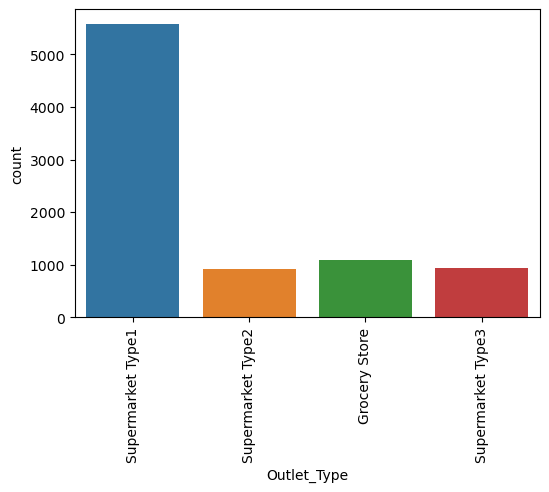

In [25]:
plt.figure(figsize = (6,4))
sns.countplot(data=Train_data,x='Outlet_Type')
plt.xticks(rotation=90)
plt.show()

In [26]:
Train_data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

### ITEM WEIGHT AND ITEM OUTLET SALES ANALYSIS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

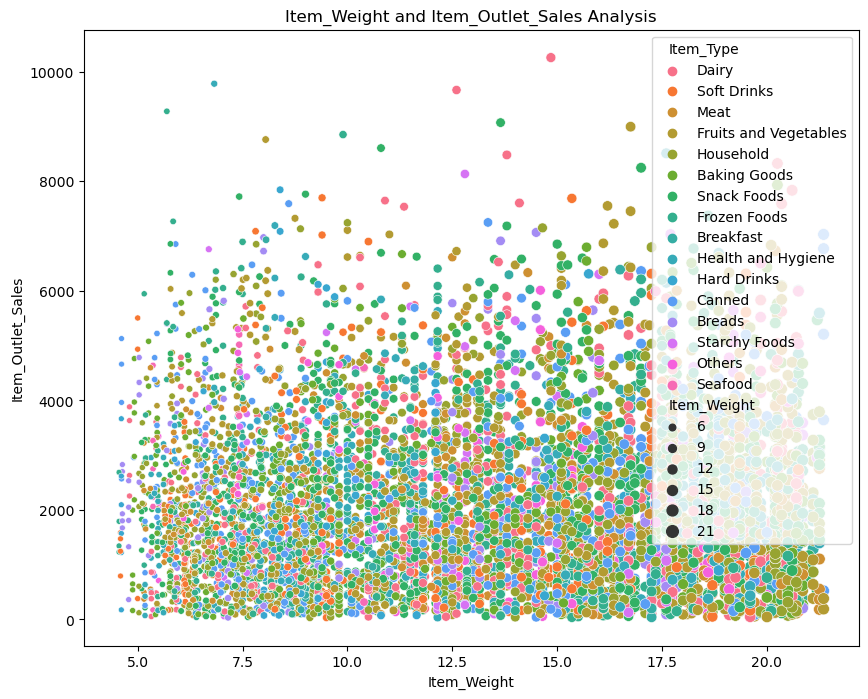

In [27]:
# SCATTERPLOT
plt.figure(figsize = (10,8))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=Train_data)
plt.show()

### ITEM VISIBILITY AND MAXIMUM RETAIL PRICE (MRP)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

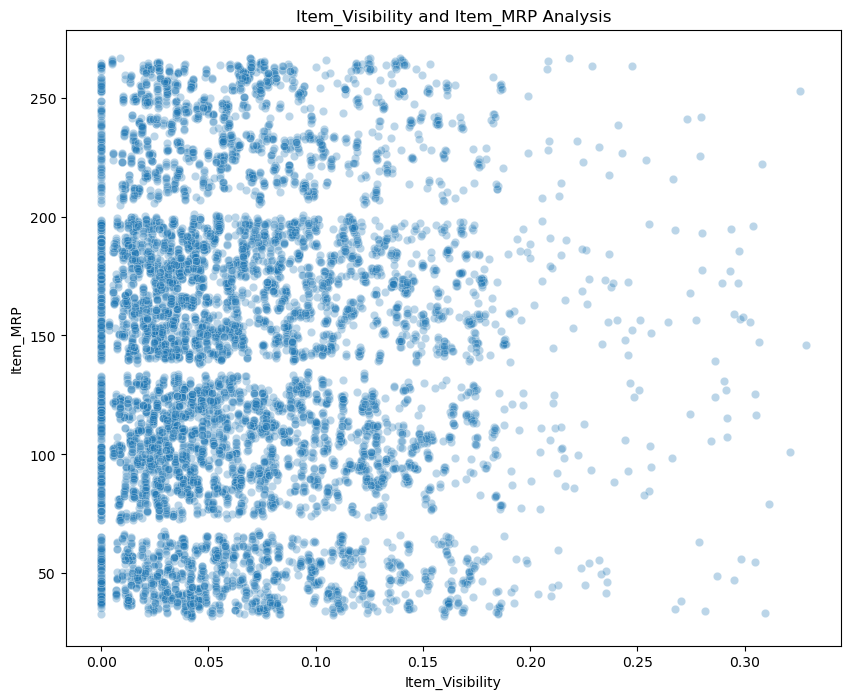

In [28]:
plt.figure(figsize = (10,8))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_MRP')
plt.title('Item_Visibility and Item_MRP Analysis')
sns.scatterplot(x='Item_Visibility',y='Item_MRP',data=Train_data,alpha = 0.3)
plt.show()

### IMPACT OF OUTLET TYPE ON ITEM OUTLET SALES

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

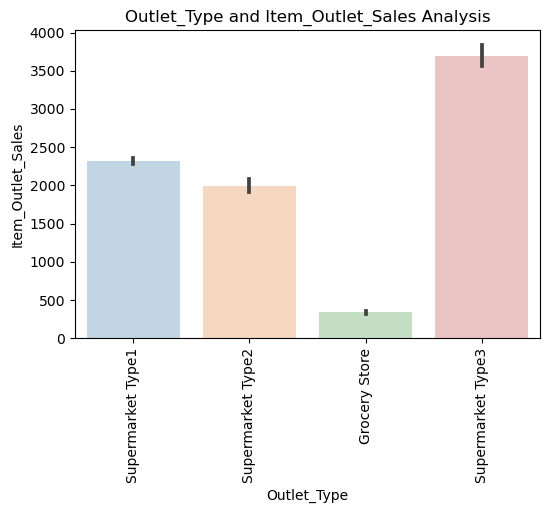

In [29]:
# BARPLOT
plt.figure(figsize = (6,4))
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet_Type and Item_Outlet_Sales Analysis')
plt.xticks(rotation=90)
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=Train_data,alpha = 0.3)
plt.show()

### IMPACT OF ITEM FAT CONTENT ON ITEM OUTLET SALES

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

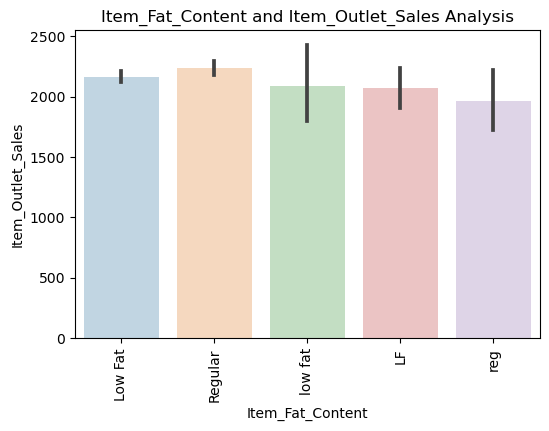

In [30]:
plt.figure(figsize = (6,4))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Fat_Content and Item_Outlet_Sales Analysis')
plt.xticks(rotation=90)
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=Train_data,alpha = 0.3)
plt.show()

In [31]:
Train_data['Item_Fat_Content'] = Train_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [32]:
df['Item_Fat_Content'] = Train_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [33]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [34]:
Train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

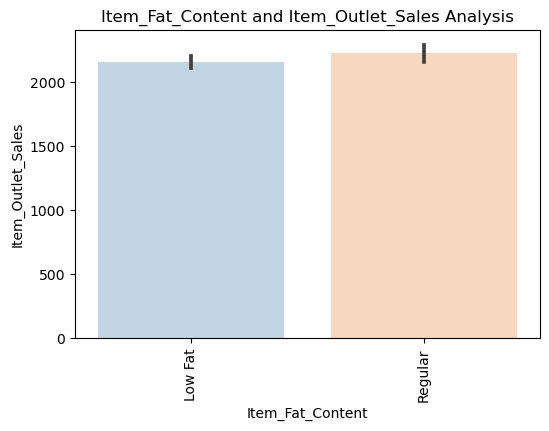

In [35]:
plt.figure(figsize = (6,4))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Fat_Content and Item_Outlet_Sales Analysis')
plt.xticks(rotation=90)
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=Train_data,alpha = 0.3)
plt.show()

In [36]:
Train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

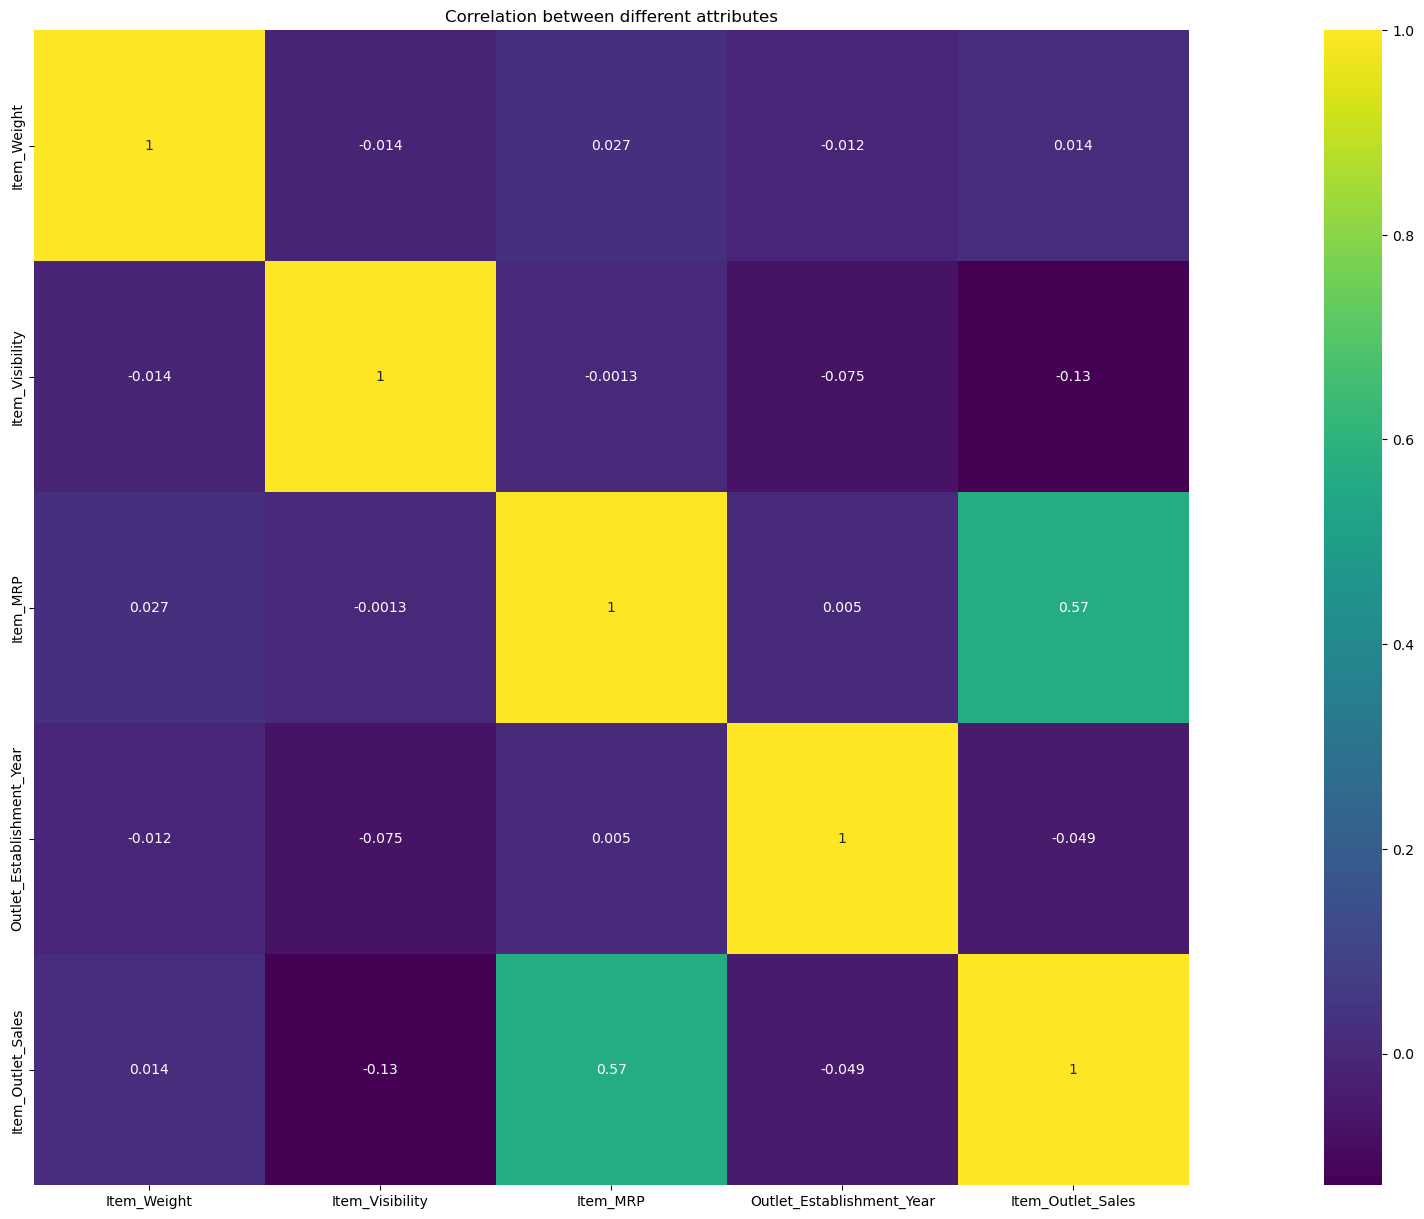

In [37]:
plt.figure(figsize=(35,15))
sns.heatmap(Train_data.corr(),vmax=1, square=True,annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

## FEATURE ENGINEERING ,SELECTION AND TRANSFORMATION

### TREATING THE MISSING VALUES

In [38]:
df.shape

(14204, 13)

In [39]:
df.isnull().sum() # There are four different columns which has null value present and we have to deal with that null value.
# The null value can be numerical or it can be categorial so we have to deal with according to the requirement.

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content             5681
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

### Item_Weight

In [40]:
df['Item_Weight'].mean()

12.792854228644284

In [41]:
#missing values have been replaced with the mean using the fillna function.
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [42]:
df.isnull().sum()  # now we can see that there is 0 missing value present in item_weight column..

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content             5681
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

### Outlet_Size 

We will replace the missing values in **Outlet_Size** with the item that appears frequently, in this case **Medium**.

In [43]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [44]:
df['Outlet_Size'].isnull().sum()

4016

In [45]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [46]:
df['Outlet_Size'].isnull().sum()

0

In [47]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content             5681
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

### Item_Visibility 

In [48]:
df['Item_Visibility'][df['Item_Visibility']==0].count()

879

In [49]:
df['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.1429909 , 0.07352856,
       0.10472015])

In [50]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(), inplace=True)

In [51]:
df['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.1429909 , 0.07352856,
       0.10472015])

In [52]:
df['Item_Visibility'][df['Item_Visibility']==0].count()

879

In [53]:
df['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

### Outlet_Establishment_Year

In [54]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [55]:
df['Outlet_year']=2009-df['Outlet_Establishment_Year'] 

In [56]:
df['Outlet_year'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_year, dtype: float64

In [57]:
df.head(4) # here a new column is added which is the updated column of outlet_establishment_year.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11


### Item_Type

In [58]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

### The item types are either Food, Drinks or Non-Consumables

In [59]:
df['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [60]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

### A closer look at each of the Item_Identifier shows that they with either "FD", "DR"(Drinks), "NC"(Non-Consumables)

### For us to do a better analysis, we will be creating 3 categories as pointed out instead of the already existing 16 categories

In [61]:
#Changing only the first 2 characters (i.e. the category ID)

df['New_Item_type'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [62]:
#Rename them to more intuitive  categories:

df['New_Item_type'] = df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_type, dtype: int64

In [63]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_year,New_Item_type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,NaN,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,12,Food
14200,FDD47,7.60,NaN,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,0,Food
14201,NCO17,10.00,NaN,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,test,7,Non-Consumable
14202,FDJ26,15.30,NaN,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,test,2,Food


### If a product is non-consumable then why associate a fat-content to them? We will get rid of this.

In [64]:
# (1)Locating Rows: df.loc[df['New_Item_type']=='Non-Consumable', 'Item_Fat_Content'] is a pandas DataFrame operation. 
# It's using boolean indexing to locate rows where the value in the 'New_Item_type' column is equal to 'Non-Consumable'.

# (2)Updating Values: For these specific rows located in the previous step, the code sets the value of the 'Item_Fat_Content' 
# column to "Non-Edible". So, for all items categorized as 'Non-Consumable', their 'Item_Fat_Content' is set to 'Non-Edible'



df.loc[df['New_Item_type']=='Non-Consumable','Item_Fat_Content']= "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [65]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_year,New_Item_type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,NaN,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,12,Food
14200,FDD47,7.60,NaN,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,0,Food
14201,NCO17,10.00,Non-Edible,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,test,7,Non-Consumable
14202,FDJ26,15.30,NaN,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,test,2,Food


### Under normal circumstance, if a product is more visible, then it's likely it will be getting higher sales. We can based on that hypothesis and create importance given to a product in a given store according to the mean of significance given to the same product in all other stores.


In [66]:
item_visib_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [67]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [68]:
function = lambda x: x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index == x['Item_Identifier']][0]
df['item_visib_avg'] = df.apply(function,axis=1).astype(float)

In [69]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_year,New_Item_type,item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable,0.000000


## DEALING WITH THE CATEGORICAL DATA

### Label Encoder We will be converting all categorical variables into numeric types (Values of 0 or 1) using the LabelEncoder function since we cannot build model on them.

In [70]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

# New variable for outlet
df['Outlet'] = label.fit_transform(df['Outlet_Identifier'])


In [71]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_year,New_Item_type,item_visib_avg,Outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food,0.931078,9
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drinks,0.933420,3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food,0.960069,9


In [72]:
df['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [73]:
varib =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet']
for i in varib:
    df[i]=label.fit_transform(df[i])

In [74]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_year,New_Item_type,item_visib_avg,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,10,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,10,1,0.960069,9


In [75]:
#Dummy Variables:

df=pd.get_dummies(df, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet'])
df.dtypes 

<IPython.core.display.Javascript object>

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Source                        object
Outlet_year                    int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_type_0                uint8
New_Item_type_1                uint8
New_Item_type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
O

In [76]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Source,Outlet_year,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,10,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,10,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,11,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,22,...,0,1,0,0,0,0,0,0,0,0


In [77]:
df.shape

(14204, 38)

## MODEL BUILDING

In [79]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [81]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Source,Outlet_year,item_visib_avg,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,train,10,0.931078,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,train,0,0.933420,0,...,0,0,0,1,0,0,0,0,0,0


In [83]:
# Here we are seperating the train and test dataset into two part from df dataset but the only condition is that for spliting 
# the train dataset the condition is that in df dataframe whose rows is equal to train will put together in a new dataframe whic
# is called train and same goes for test
train = df.loc[df['Source'] == 'train'] 
test = df.loc[df['Source'] == 'test']

In [85]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Source,Outlet_year,item_visib_avg,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,train,10,0.931078,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,train,0,0.933420,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,train,10,0.960069,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,train,11,0.000000,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,train,22,0.000000,0,...,0,1,0,0,0,0,0,0,0,0


In [87]:
train.drop(['Source'],axis=1,inplace=True) # Here we are droping the source column name which has only 'train' rows present.

In [89]:
test.drop(['Item_Outlet_Sales','Source'],axis=1,inplace=True)

In [91]:
test.head(3)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_year,item_visib_avg,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,FDW58,20.75,0.007565,107.8622,OUT049,10,1.029192,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8524,FDW14,8.30,0.038428,87.3198,OUT017,2,1.130311,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8525,NCN55,14.60,0.099575,241.7538,OUT010,11,1.735215,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [96]:
X_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train = train['Item_Outlet_Sales']
X_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

In [97]:
X_train.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_year,item_visib_avg,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,10,0.931078,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,0,0.933420,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## LINEAR REGRESSION

In [100]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [106]:
lr_y_pred=lr.predict(X_test)

In [107]:
lr_y_pred

array([1858.22368536, 1542.31545678, 1871.14116321, ..., 1805.82428049,
       3545.95835518, 1235.83189561])

In [103]:
lr_accuracy = round(lr.score(X_train,y_train)*100)
lr_accuracy

56

## DECISION TREE REGRESSOR

In [104]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [108]:
tree_y_pred = tree.predict(X_test)

In [109]:
tree_y_pred

array([1678.1489    , 1412.15620504,  584.75776477, ..., 1827.83284545,
       3692.81910244, 1211.249992  ])

In [110]:
tree_accuracy = round(tree.score(X_train,y_train)*100)
tree_accuracy

62

## RANDOM FOREST REGRESSOR

In [111]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=100, n_estimators=400,
                      n_jobs=4)

In [112]:
rfr_y_pred = rfr.predict(X_test)

In [113]:
rfr_y_pred

array([1650.52654173, 1365.73975546,  571.04950169, ..., 1931.07711561,
       3653.22766706, 1297.43084322])

In [114]:
rfr_accuracy = round(rfr.score(X_train,y_train)*100)
rfr_accuracy

61

### XGBOOST REGRESSOR

In [117]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 100, learning_rate=0.05)
xgb.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [118]:
xgb_pred =xgb.predict(X_test) 

In [119]:
xgb_pred

array([1543.997  , 1333.0413 ,  570.20526, ..., 1929.1438 , 4002.653  ,
       1292.3577 ], dtype=float32)

In [122]:
xgb_accuracy = (xgb.score(X_train,y_train)*100)
xgb_accuracy

67.61550606303784

In [126]:
print('LINEAR REGRESSION\nSCORE: ',lr_accuracy,'%')
print('DECISION TREE REGRESSOR\nSCORE: ',tree_accuracy,'%')
print('RANDOM FOREST REGRESSOR\nSCORE: ',rfr_accuracy,'%')
print('XGBOOST REGRESSOR: ',xgb_accuracy,'%')

LINEAR REGRESSION
SCORE:  56 %
DECISION TREE REGRESSOR
SCORE:  62 %
RANDOM FOREST REGRESSOR
SCORE:  61 %
XGBOOST REGRESSOR:  67.61550606303784 %


# NOW WE CAN CONCLUDE THAT WHICH MODEL IS BEST FOR THE PREDICTION OF BIG MART SALES AND WE CAN SEE THAT XGBOOST PERFORMANCE AND SCORE IS GOOD IN COMPARISION TO THE OTHERS MODEL LIKE LINEAR REGRESSION,DECISION TREE REGRESSOR AND RANDOM FOREST REGRESSOR.
